# Introduction to Numpy, Pandas and Matplotlib

1. We review the **generic** libraries we will use during this course.
2. There are **domain specific** libraries like `NLT`, `skimage`, `tensorflow` that we will review later.
3. Please make sure you install **anaconda** with python 3.6
and tensorflow on your working machines.

**Why numpy**

* python is a scripting language, well suited for performing generic task
* optimized for ease of use, not for computational speed
* make it easy to call specialized libraries to perform expensive operations.

Numerical computations
* for loops are very **slow** in python
* `numpy` allows us to define computions that apply to large chunks of data. 
* The `numpy` way to define computations on *all the data* at the same time takes some **getting used to**. 
* It is a **general** technique, can be applied in any other computer language.
* `numpy` is becoming a standard. `tensorfow`, for example will define operations in parallel to `numpy`. Other computer languages are beginning to imitate `numpy` API and terminology.

## Preliminaries

### Imports

In [49]:
import os
import skimage
import numpy as np # we import with shorter names
                   # this short names are conventional
                   # you could import them with any other name
                   # but every one uses np,pd and plt
import pandas as pd
import matplotlib.pyplot as plt

# make sure we can show plots inside the jupyter notebook cells
%matplotlib inline 

import sys
sys.path.append("../..")
#import E4525_ML.mnist  # this will work if you follow the directory organization below

### Directory Organization

We will always assume a relative organization like this

* **root**
    * **lectures** (lecture notes and jupyter notebooks)
        * lecture1
        * lecture2
        * ...
    * **E4525_ML** ( python modules reused during the course)
        * module1.py
        * module2.py
        * ...
    * **raw** (raw unmodified data we will use during course)
        * dataset1 (directory for dataset1)
        * dataset2
        * ...
    * **data** (pre-processed data )
        * project1
        * project2
        * ...
    * **scripts** (stand along python scripts)
        * script1.py
        * script2.py
        
If you saved notebooks, data, etc this way, all examples from course should work out of the box

Here we create a working data directory for this notebook, in case it did not exist already

In [50]:
data_dir="../../data/introduction"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

### Random Numbers

We initialize the random seed at the start of each notebook so that the results are **reproducible**.

It does not matter what number we use, but we should all get the same numbers if we use the same seed.

In [51]:
seed=1367
np.random.seed(seed)

## Numpy

They is very good [documentation](https://docs.scipy.org/doc/numpy/user/index.html) for numpy.

But [StackOverflow](https://stackoverflow.com/) is also a **great resource** for programing questions

The main object in `numpy` is the `array`.

An array is an efficient emplamentation of a **tensor**: and object with one or more indexes.

1. A `np.array` with zero indexes is a **scalar**
1. A `np.array` with only one index is a **vector**
2. A `np.array` with two indexes is a **matrix**
3. A object with three or more indexes we will call a **tensor**.

We will need over the course objects with 3, 4, or more indexes. 

Let's create a scalar, a vector, a matrix and tensor

In [52]:
s=np.array(4.0)
v=np.array([1, 2, 3])
X=np.array([
            [ 1.0, 2, 3],
            [ 4, 5, 6],
            [ 6, 7, 8],
            [ 9 ,10,11]
           ])
T=np.array([ 
            [
             [ 1, 2, 3],
             [ 4, 5, 6],
             [ 6, 7, 8]
            ],
            [
             [ 9,10,11],
             [12,13,14],
             [15,16,17]
            ],
           ],
            dtype=np.double)


We can see the contents

In [53]:
print("scalar",s,s.dtype)
print("vector",v,v.dtype)
print("Matrix",X,X.dtype),
print("tensor",T,T.dtype)

scalar 4.0 float64
vector [1 2 3] int64
Matrix [[  1.   2.   3.]
 [  4.   5.   6.]
 [  6.   7.   8.]
 [  9.  10.  11.]] float64
tensor [[[  1.   2.   3.]
  [  4.   5.   6.]
  [  6.   7.   8.]]

 [[  9.  10.  11.]
  [ 12.  13.  14.]
  [ 15.  16.  17.]]] float64


The type of of the various objects, note that the vector is of dtype `int32`

In [54]:
print("scalar",s.dtype)
print("vector",v.dtype)
print("Matrix",X.dtype),
print("tensor",T.dtype)

scalar float64
vector int64
Matrix float64
tensor float64


The number of dimensions of each object, also known as the tensor's  **rank** 

In [55]:
print("scalar",s.ndim,s.shape,len(s.shape))
print("vector",v.ndim,v.shape,len(v.shape))
print("Matrix",X.ndim,X.shape,len(X.shape))
print("tensor",T.ndim,T.shape,len(T.shape))

scalar 0 () 0
vector 1 (3,) 1
Matrix 2 (4, 3) 2
tensor 3 (2, 3, 3) 3


And the shape (the size of each one of the dimensions)

In [56]:
print("scalar",s.shape)
print("vector",v.shape)
print("Matrix",X.shape),
print("tensor",T.shape)

scalar ()
vector (3,)
Matrix (4, 3)
tensor (2, 3, 3)


Size is the total number of element of the array, the **product** of the size of alls its dimensions

In [57]:
print("scalar",s.size)
print("vector",v.size)
print("Matrix",X.size),
print("tensor",T.size)

scalar 1
vector 3
Matrix 12
tensor 18


As a convenience, the function **`len`** gives the size of the **first** dimension

In [58]:
#print("scalar",len(s)) # does not work for a zero dimensional tensor!
print("vector",len(v))
print("Matrix",len(X))
print("tensor",len(T))

vector 3
Matrix 4
tensor 2


### Indexing

Access to elements is **zero indexed** and stored in **Row Major** order: for a matrix first index is row.

In [59]:
print("scalar",s)
print("vector",v)
print("Matrix",X),
print("tensor",T)

scalar 4.0
vector [1 2 3]
Matrix [[  1.   2.   3.]
 [  4.   5.   6.]
 [  6.   7.   8.]
 [  9.  10.  11.]]
tensor [[[  1.   2.   3.]
  [  4.   5.   6.]
  [  6.   7.   8.]]

 [[  9.  10.  11.]
  [ 12.  13.  14.]
  [ 15.  16.  17.]]]


In [60]:
print("scalar",s)

scalar 4.0


In [61]:
print("vector[1]",v[1])

vector[1] 2


In [62]:
print("Matrix[0,2]",X[0,2])

Matrix[0,2] 3.0


In [63]:
print("tensor[1,1,-1]",T[1,1,-1]) # in python negative elements count from the end

tensor[1,1,-1] 14.0


We can do **slicing** to return sub-tensors with a lower number of dimensions

In [64]:
print("Matrix[0]",X[0],"first row")
print("Matrix[:,0]",X[:,0],"first column")
print("tensor[-1]\n",T[-1],"\n     last sub-matrix")
print("tensor[:,1,:]\n",T[:,1,:],"\n    fixed second index")
print("tensor[0,:,-1]\n",T[0,:,-1],"\n    last column of first submatrix")

Matrix[0] [ 1.  2.  3.] first row
Matrix[:,0] [ 1.  4.  6.  9.] first column
tensor[-1]
 [[  9.  10.  11.]
 [ 12.  13.  14.]
 [ 15.  16.  17.]] 
     last sub-matrix
tensor[:,1,:]
 [[  4.   5.   6.]
 [ 12.  13.  14.]] 
    fixed second index
tensor[0,:,-1]
 [ 3.  6.  8.] 
    last column of first submatrix


We can also **promote** a tensor to a higher rank 

In [65]:
print('v:',v)
M1=v[:,np.newaxis]
M2=v[np.newaxis,:]
print("M1.shape",M1.shape)
print("M1\n",M1)
print("M2.shape",M2.shape)
print("M2\n",M2)

v: [1 2 3]
M1.shape (3, 1)
M1
 [[1]
 [2]
 [3]]
M2.shape (1, 3)
M2
 [[1 2 3]]


### Functions  on `np.arrays`

Be default, operations on np.arrays work element wise

In [66]:
v2=2*v
v_sqrt=v**(1/2) # or np.sqrt(v)
print("v",v)
print("2*v",v2)
print("sqrt(v)",v_sqrt)

v [1 2 3]
2*v [2 4 6]
sqrt(v) [ 1.          1.41421356  1.73205081]


Sum and Multiplication make sense if both objects have the same size

In [67]:
print("v+v2",v+v2)
print("v*v2",v*v2)

v+v2 [3 6 9]
v*v2 [ 2  8 18]


arrays have defined a **large number** of special functions

In [68]:
print("log(v)",np.log(v))
print("exp(v)",np.exp(v))
print("sin(pi/4*v)",np.sin(np.pi/4*v))
print("max(X,1.2)\n",np.maximum(X,1.2))

log(v) [ 0.          0.69314718  1.09861229]
exp(v) [  2.71828183   7.3890561   20.08553692]
sin(pi/4*v) [ 0.70710678  1.          0.70710678]
max(X,1.2)
 [[  1.2   2.    3. ]
 [  4.    5.    6. ]
 [  6.    7.    8. ]
 [  9.   10.   11. ]]


### Aggregate Functions

Some functions apply to a group of numbers, by default, they are applied to the whole array

In [69]:
print("scalar",s.sum())
print("vector",v.sum())
print("Matrix",X.sum()),
print("tensor",T.sum())

scalar 4.0
vector 6
Matrix 72.0
tensor 159.0


This are a few useful aggregate functions

In [70]:
print('v:',v)
print("sum(v)",np.sum(v))
print("product(v)",np.product(v))
print("mean(v)",np.mean(v))
print("std(v)",np.std(v))
print('T:',T)
print("max(T)",np.max(T))
print('X:',X)
print("min(X)",np.min(X))

v: [1 2 3]
sum(v) 6
product(v) 6
mean(v) 2.0
std(v) 0.816496580928
T: [[[  1.   2.   3.]
  [  4.   5.   6.]
  [  6.   7.   8.]]

 [[  9.  10.  11.]
  [ 12.  13.  14.]
  [ 15.  16.  17.]]]
max(T) 17.0
X: [[  1.   2.   3.]
 [  4.   5.   6.]
 [  6.   7.   8.]
 [  9.  10.  11.]]
min(X) 1.0


Aggreate functions can take an **axis** argument, in which case the lower the rank of the tensor by one, and apply
the function accross that axes only.

In [71]:
print('X:',X)
print("sum(X,columns)",np.sum(X,axis=0))
print("sum(X,rows)",np.sum(X,axis=1))

X: [[  1.   2.   3.]
 [  4.   5.   6.]
 [  6.   7.   8.]
 [  9.  10.  11.]]
sum(X,columns) [ 20.  24.  28.]
sum(X,rows) [  6.  15.  21.  30.]


Let's do that for the rank-3 tensor

In [72]:
print('T:',T)
print("mean(T,axis=0)\n",np.sum(T,axis=0))
print("mean(T,axis=1)\n",np.sum(T,axis=1))
print("mean(T,axis=2)\n",np.sum(T,axis=2))

T: [[[  1.   2.   3.]
  [  4.   5.   6.]
  [  6.   7.   8.]]

 [[  9.  10.  11.]
  [ 12.  13.  14.]
  [ 15.  16.  17.]]]
mean(T,axis=0)
 [[ 10.  12.  14.]
 [ 16.  18.  20.]
 [ 21.  23.  25.]]
mean(T,axis=1)
 [[ 11.  14.  17.]
 [ 36.  39.  42.]]
mean(T,axis=2)
 [[  6.  15.  21.]
 [ 30.  39.  48.]]


### Broadcasting and Index Manipulations with Tensors

Broadcasting is the process of making arrays with different shapes have compatible shapes for arithmetic operations.

See the numpy [broadcasting ](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) documentation.



When operating on two arrays of different rank, numpy will "fill in" (with copies) the lower rank one to mark the number of dimensions of the high rank vector

In [73]:
print('s:',s)
print('v:',v)
print("s+v",s+v)
print("X",X)
print("s+X\n",s+X)
print("v*X\n",v*X, "this repeats each v as a column")

s: 4.0
v: [1 2 3]
s+v [ 5.  6.  7.]
X [[  1.   2.   3.]
 [  4.   5.   6.]
 [  6.   7.   8.]
 [  9.  10.  11.]]
s+X
 [[  5.   6.   7.]
 [  8.   9.  10.]
 [ 10.  11.  12.]
 [ 13.  14.  15.]]
v*X
 [[  1.   4.   9.]
 [  4.  10.  18.]
 [  6.  14.  24.]
 [  9.  20.  33.]] this repeats each v as a column


What if we want to repeat v as a row instead? We use **`np.newaxis``**

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when

1. they are equal, or
2. one of them is 1

Given a vector 
    $v_i$ and matrix $X_{k,j}$ we want to form the expression
    
$$
        v_j\  X_{k,j}
$$

the dimension of $v$ and the last dimension of $X$ must match

In [74]:
print("By Column")
print("v.shape",v.shape)
vc=v[np.newaxis,:]
print("v[np.newaxis,:]",vc.shape)
print("v[np.newaxis,:]",vc)
print("v[np.newaxis,:]*X\n",vc*X)

By Column
v.shape (3,)
v[np.newaxis,:] (1, 3)
v[np.newaxis,:] [[1 2 3]]
v[np.newaxis,:]*X
 [[  1.   4.   9.]
 [  4.  10.  18.]
 [  6.  14.  24.]
 [  9.  20.  33.]]


Given a vector 
    $v_i$ and matrix $X_{k,j}$ we want to form the expression
    
$$
        v_k\  X_{k,j}
$$

the dimension of $v$ and the first dimension of $X$ must match

In [75]:
v4=np.array([0,1,2,3])
print("X:",X)
print("By Row")
print("v.shape",v4.shape)
v4=v4[:,np.newaxis]
print("v[:,np.newaxis]",v4.shape)
print("v[:,np.newaxis]*X\n",v4*X)

X: [[  1.   2.   3.]
 [  4.   5.   6.]
 [  6.   7.   8.]
 [  9.  10.  11.]]
By Row
v.shape (4,)
v[:,np.newaxis] (4, 1)
v[:,np.newaxis]*X
 [[  0.   0.   0.]
 [  4.   5.   6.]
 [ 12.  14.  16.]
 [ 27.  30.  33.]]


Given a matrix $X_{k,j}$ we want to form the three index tensor
$$
    T_{k,j,i} = X_{k,j} X_{k,i}
$$

In [76]:
X[:,:,np.newaxis]*X[:,np.newaxis,:]

array([[[   1.,    2.,    3.],
        [   2.,    4.,    6.],
        [   3.,    6.,    9.]],

       [[  16.,   20.,   24.],
        [  20.,   25.,   30.],
        [  24.,   30.,   36.]],

       [[  36.,   42.,   48.],
        [  42.,   49.,   56.],
        [  48.,   56.,   64.]],

       [[  81.,   90.,   99.],
        [  90.,  100.,  110.],
        [  99.,  110.,  121.]]])

### Worked out Example: Sample Covariance with Numpy

Let's assume we observe a vector-valued random variable $X\in\mathbb{R}^D$.

The components of one observation are  $x_d$  for $d=1,\dots, D$, $N$ times.

We will represent $N$ samples of $X$ by a matrix $X_{i,d}$ where each row $i=1,\dots,N$ is one observation of the $D$-dimensional vector.

The sample mean of $X$ is
$$
    \hat{\mu}_d = \frac{1}{N} \sum_{i=1}^N X_{i,d}
$$
And the (biased) sample covariance of $X$ is given by
$$
    \hat{\sigma}_{d,d'} = \frac{1}{N}\sum_{i=1}^N X_{i,d} X_{i,d'} -  \mu_d \mu_{d'}
$$

In [77]:
N,D=X.shape
print("N",N)
print("D",D)

N 4
D 3


#### Implementation using low level index operations

In [78]:
mu=X.mean(axis=0)
print("mu.shape",mu.shape)
mu

mu.shape (3,)


array([ 5.,  6.,  7.])

We now form the product of means
$$
    C_{d,d'} = \mu_d \mu_{d'}
$$

In [79]:
C = mu[:,np.newaxis]*mu[np.newaxis,:]
print("C.shape",C.shape)
C

C.shape (3, 3)


array([[ 25.,  30.,  35.],
       [ 30.,  36.,  42.],
       [ 35.,  42.,  49.]])

Now we write as before we tensor

$$
    T_{k,j,i} = X_{k,j} X_{k,i}
$$


In [80]:
T=X[:,:,np.newaxis]*X[:,np.newaxis,:]
print("T.shape",T.shape)
T

T.shape (4, 3, 3)


array([[[   1.,    2.,    3.],
        [   2.,    4.,    6.],
        [   3.,    6.,    9.]],

       [[  16.,   20.,   24.],
        [  20.,   25.,   30.],
        [  24.,   30.,   36.]],

       [[  36.,   42.,   48.],
        [  42.,   49.,   56.],
        [  48.,   56.,   64.]],

       [[  81.,   90.,   99.],
        [  90.,  100.,  110.],
        [  99.,  110.,  121.]]])

Finally, the covariance is
$$ 
\hat{\sigma}_{d,d'} = \frac{1}{N}\sum_{i=1}^N T_{i,d,d'} -  C_{d,d'}
$$

In [81]:
sigma=np.mean(T,axis=0)-C
print("sigma.shape",sigma.shape)
print(sigma)

sigma.shape (3, 3)
[[ 8.5  8.5  8.5]
 [ 8.5  8.5  8.5]
 [ 8.5  8.5  8.5]]


All this can be written in a  fairly dense one-liner

In [82]:
sigma=np.mean(X[:,:,np.newaxis]*X[:,np.newaxis,:],axis=0)-mu[:,np.newaxis]*mu[np.newaxis,:]
print("sigma.shape",sigma.shape)
print(sigma)

sigma.shape (3, 3)
[[ 8.5  8.5  8.5]
 [ 8.5  8.5  8.5]
 [ 8.5  8.5  8.5]]


#### Using matrix algebra

The expression above can be written in matrix form as
$$
    C = \frac{1}{N} X^T X - \mu \mu^T
$$


In [83]:
np.dot(X.T,X)/N-np.outer(mu,mu)

array([[ 8.5,  8.5,  8.5],
       [ 8.5,  8.5,  8.5],
       [ 8.5,  8.5,  8.5]])

1. `numpy.dot` is matrix product, super useful.
2. `numpy.outer` is the **outer product**, create the object with two indexes.

Matrix notation can get confusing when there are many dimensions, because the indexes are implicit.

I, personally, find it easier to keep track of the indexes.

#### Specialized `numpy` function

We can check against the **ready-made** numpy function

In [84]:
np.cov(X,rowvar=False,bias=True)

array([[ 8.5,  8.5,  8.5],
       [ 8.5,  8.5,  8.5],
       [ 8.5,  8.5,  8.5]])

There are all this flags and arguments you have to remember.


## Pandas

`pandas` is data analysis library based on top of `numpy`

It is a convenience library that allows us to work with **named columns** instead of column indexes.

The central object in `pandas` is the  **`DataFrame`**.


It is specially useful when working with a small enough number of features (say 10 or 100) that it makes
sense to have names for all of them.

The documentation can be found [here](https://pandas.pydata.org/)

In [85]:
data=pd.DataFrame(X,columns=["Col1","Col2","Col3"])
data

,Col1,Col2,Col3
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,6.0,7.0,8.0
3,9.0,10.0,11.0


We can extract one column

In [86]:
data["Col1"]

0    1.0
1    4.0
2    6.0
3    9.0
Name: Col1, dtype: float64

Or a few columns

In [87]:
submatrix=data[["Col1","Col3"]]
submatrix

,Col1,Col3
0,1.0,3.0
1,4.0,6.0
2,6.0,8.0
3,9.0,11.0


We can get to the underlying numpy object

In [88]:
submatrix.as_matrix()

array([[  1.,   3.],
       [  4.,   6.],
       [  6.,   8.],
       [  9.,  11.]])

You can append new columns as computations on the old ones

In [89]:
data["Y"]=data["Col1"]*data["Col2"]-data["Col3"]
data.head()

,Col1,Col2,Col3,Y
0,1.0,2.0,3.0,-1.0
1,4.0,5.0,6.0,14.0
2,6.0,7.0,8.0,34.0
3,9.0,10.0,11.0,79.0


Pandas also have convenient functions to save and read csv files

In [90]:
filename="X.csv"
data.to_csv(data_dir+"/"+filename,index=False) # do not save the index column

We can also easly read the data back

In [91]:
data2=pd.read_csv(data_dir+"/"+filename)
data2

,Col1,Col2,Col3,Y
0,1.0,2.0,3.0,-1.0
1,4.0,5.0,6.0,14.0
2,6.0,7.0,8.0,34.0
3,9.0,10.0,11.0,79.0


## Matplotlib

Matplotlib is a Python **2D plotting library** which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

The documentation is (here)[https://matplotlib.org], but, as usual [StackOverflow](https://stackoverflow.com/) is a great place to look for answers.

As all plotting libraries, the API is very large. But let's just do a simple demo

In [92]:
x=np.linspace(-1,1,100) # this generates 100 equaly spaces numbers from -1 to 1 inclusive

In [93]:
y0=np.sin(np.pi*x)
y1=y0+0.25*np.sin(3*np.pi*x)

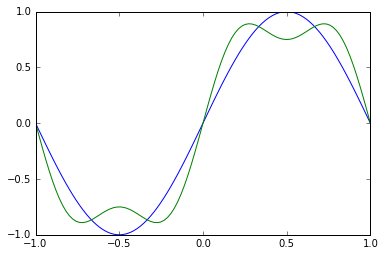

In [94]:
plt.plot(x,y0)
plt.plot(x,y1)

You can add titles, axis labels, legends, etc

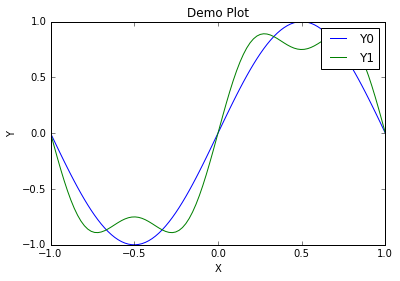

In [95]:
plt.plot(x,y0,label="Y0")
plt.plot(x,y1,label="Y1")
plt.title("Demo Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.savefig(data_dir+"/demo.jpg") # you can save a copy of the graph